In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
with open('../data/cv_dataframe.pickle','rb') as rf:
    cv_df = pickle.load(rf)

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cv_df)

In [4]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(df_scaled)

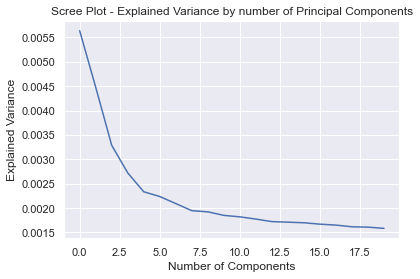

In [5]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Number of Components')
plt.title('Scree Plot - Explained Variance by number of Principal Components');

In [6]:
X_pca[:,:7]

array([[-0.03660074, -0.09056564,  1.41726297, ..., -1.6505159 ,
         1.17100392, -0.62903665],
       [ 2.54840447,  3.09857813,  2.71601524, ...,  1.85047164,
        -3.33324593,  4.44934969],
       [ 0.48044952,  4.17466374,  2.12655189, ..., -2.96341722,
        -1.89403154,  2.06390742],
       ...,
       [ 2.84067433,  0.58173645, -2.62569741, ..., -0.08917685,
         0.50270151,  3.15128233],
       [ 2.8380209 , -0.64416361,  2.32182431, ...,  2.5034271 ,
         0.34743651, -1.64743433],
       [ 1.53140068, -0.96131909, -0.45197871, ..., -0.41273675,
        -1.20670894, -2.46254036]])

Based on this it looks like 2 or 3 might be a good number of components.  I'll go with two for visual purposes.

In [7]:
k_tries = 12
inertias = []
for k in range(1,k_tries):
    kmeans = KMeans(k)
    kmeans.fit(X_pca[:,:2])
    inertias.append(kmeans.inertia_)

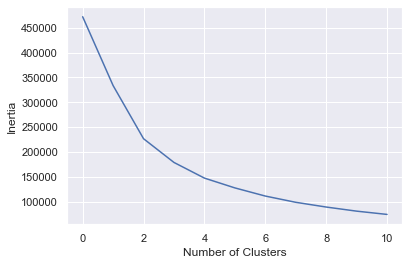

In [8]:
plt.plot(inertias)
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters');

Four or five clusters seems ideal, which is similar to my topic modeling analysis.

In [9]:
pca_df = pd.DataFrame(X_pca)

In [10]:
k = 4
kmeans = KMeans(k)
kmeans.fit(pca_df[[0,1]])

KMeans(n_clusters=4)

In [11]:
pca_df['cluster'] = kmeans.labels_

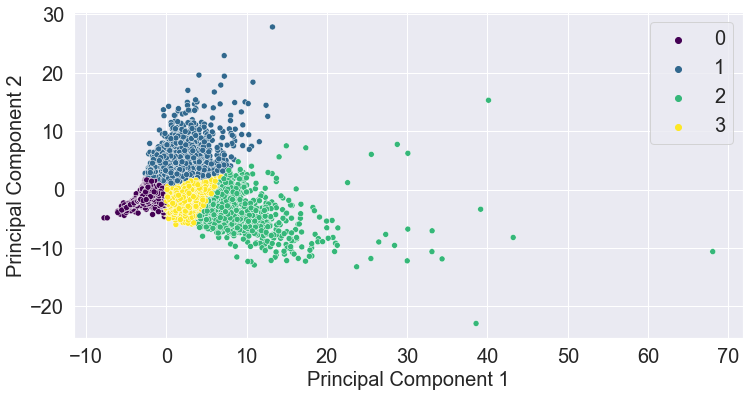

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=pca_df,x=pca_df[0],y=pca_df[1],hue='cluster',palette='viridis')
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.savefig('../images/pca_cluster.png',dpi=400);